# EXERCÍCIO
---

O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados.

* Carregue a base de dados `csv_result-ebay_confianca_completo.csv`, que é uma base de dados que utilizei no meu pós-doutorado para prever confiança de usuários baseado em traços de personalidade extraídos de textos


* A classe é o atributo `reputation`, que pode ser reputação <b>boa</b> ou reputação <b>ruim</b>


* Utilize o algoritmo <b>Random Forest</b> e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão. A ideia de utilização é a mesma, e no link a seguir você pode verificar a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
---

In [1]:
#!pip install imbalanced-learn
#!conda install -c conda-forge imbalanced-learn

import pandas as pd
import random as rd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE 

## Carregando a base de dados

In [2]:
df = pd.read_csv('CSVs/csv_result-ebay_confianca_completo.csv')
df.shape

(5806, 75)

In [3]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [4]:
df.isnull().sum()
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print(df.isnull().sum()[i])

In [5]:
df.dropna(inplace=True)
df.shape

(5806, 75)

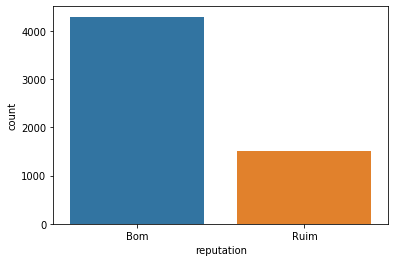

In [6]:
sns.countplot(df['reputation']);

In [7]:
df['blacklist'].value_counts()

N    5022
B     784
Name: blacklist, dtype: int64

In [8]:
df['blacklist'] = df['blacklist'].map({'N':0, 'B':1})
df['blacklist'].value_counts()

0    5022
1     784
Name: blacklist, dtype: int64

In [9]:
df.columns

Index(['feedbacks', 'reviews', 'blacklist', 'mextraversion', 'cextraversion',
       'sextraversion', 'mneuroticism', 'cneuroticism', 'sneuroticism',
       'mconscientiousness', 'cconscientiousness', 'sconscientiousness',
       'magreeableness', 'cagreeableness', 'sagreeableness', 'mopenness',
       'copenness', 'sopenness', 'agreeablenessIndico',
       'conscientiousnessIndico', 'extraversionIndico', 'opennessIndico',
       'openessWatson', 'conscientiousnessWatson', 'extraversionWatson',
       'agreeablenessWatson', 'neuroticismWatson', 'o_adventure', 'o_artistic',
       'o_emotionality', 'o_imagination', 'o_intelect', 'o_liberalism',
       'c_achievement', 'c_cautiouness', 'c_dutifulness', 'c_orderliness',
       'c_discipline', 'c_efficacy', 'e_activity', 'e_assertiveness',
       'e_cheerfulness', 'e_excitement', 'e_friend', 'e_gregariouness',
       'a_altruism', 'a_cooperation', 'a_modesty', 'a_morality', 'a_simpathy',
       'a_trust', 'n_anger', 'n_anxiety', 'n_depress

In [10]:
X = df.iloc[:, 0:74].values
X.shape

(5806, 74)

In [11]:
X

array([[ 0.        , 49.        ,  0.        , ...,  0.64007259,
         0.59803704,  0.82871638],
       [ 0.        , 56.        ,  0.        , ...,  0.64446459,
         0.60304177,  0.80937897],
       [ 0.        , 50.        ,  0.        , ...,  0.65546971,
         0.64504203,  0.8260389 ],
       ...,
       [78.        ,  0.        ,  0.        , ...,  0.69746616,
         0.6739035 ,  0.83207265],
       [95.        ,  0.        ,  0.        , ...,  0.77067732,
         0.71004776,  0.81992383],
       [53.        ,  0.        ,  0.        , ...,  0.62393063,
         0.63312052,  0.79209211]])

In [12]:
y = df.iloc[:,74].values
y.shape

(5806,)

In [13]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

## Dividindo a base de dados em treino e teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train.shape, y_train.shape

((4644, 74), (4644,))

In [15]:
X_test.shape, y_test.shape

((1162, 74), (1162,))

In [16]:
print(f'{np.unique(y, return_counts=True)[0][0]} = \
{round(np.unique(y, return_counts=True)[1][0] / len(df), 2) * 100}%')
print(f'{np.unique(y, return_counts=True)[0][1]} = \
{round(np.unique(y, return_counts=True)[1][1] / len(df), 2) * 100}%')

Bom = 74.0%
Ruim = 26.0%


## Classificação com Random Forest

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.7469879518072289

In [19]:
cm = confusion_matrix(pred, y_test)
cm

array([[854, 288],
       [  6,  14]], dtype=int64)

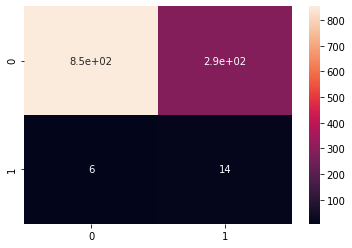

In [20]:
sns.heatmap(cm, annot=True);

In [21]:
print(f'Acurácia: Reputation Bom = {cm[0][0] / sum(cm[0])}')
print(f'Acurácia: Reputation Ruim = {cm[1][1] / sum(cm[1])}')

Acurácia: Reputation Bom = 0.7478108581436077
Acurácia: Reputation Ruim = 0.7


## Subamostragem - Tomek links

In [22]:
tl = TomekLinks(sampling_strategy = 'majority')
X_under, y_under = tl.fit_resample(X, y)
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [23]:
id_under = tl.sample_indices_
len(id_under)

5417

In [24]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [25]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507], dtype=int64))

In [26]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under,
                                                           test_size = 0.2, stratify = y_under)

X_train_u.shape, y_train_u.shape

((4333, 74), (4333,))

In [27]:
X_test_u.shape, y_test_u.shape

((1084, 74), (1084,))

## Classificação (undersampling)  com Random Forest

In [28]:
model_u = RandomForestClassifier()
model_u.fit(X_train_u, y_train_u)

RandomForestClassifier()

In [29]:
pred_u = model_u.predict(X_test_u)
accuracy_score(pred_u, y_test_u)

0.724169741697417

In [30]:
cm_u = confusion_matrix(pred_u, y_test_u)
cm_u

array([[768, 285],
       [ 14,  17]], dtype=int64)

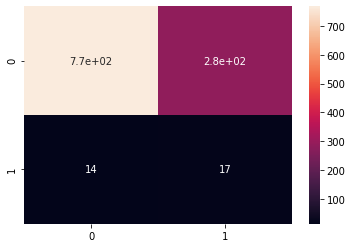

In [31]:
sns.heatmap(cm_u, annot=True);

In [32]:
print(f'Acurácia: Reputation Bom = {cm_u[0][0] / sum(cm_u[0])}')
print(f'Acurácia: Reputation Ruim = {cm_u[1][1] / sum(cm_u[1])}')

Acurácia: Reputation Bom = 0.7293447293447294
Acurácia: Reputation Ruim = 0.5483870967741935


## Sobreamostragem (SMOTE)

In [71]:
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 5)
X_over, y_over = sm.fit_resample(X, y)
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [72]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [73]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64))

In [74]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over,
                                                           test_size=0.2, stratify=y_over)
X_train_o.shape, y_train_o.shape

((6878, 74), (6878,))

In [75]:
X_test_o.shape, y_test_o.shape

((1720, 74), (1720,))

In [76]:
model_o = RandomForestClassifier()
model_o.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [77]:
pred_o = model_o.predict(X_test_o)
accuracy_score(pred_o, y_test_o)

0.8261627906976744

In [78]:
cm_o = confusion_matrix(pred_o, y_test_o)
cm_o

array([[723, 162],
       [137, 698]], dtype=int64)

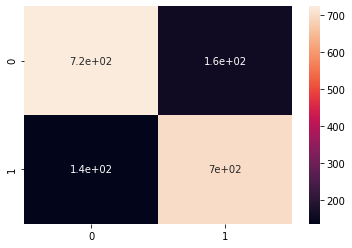

In [79]:
sns.heatmap(cm_o, annot=True);

In [80]:
print(f'Acurácia: Reputation Bom = {cm_o[0][0] / sum(cm_o[0])}')
print(f'Acurácia: Reputation Ruim = {cm_o[1][1] / sum(cm_o[1])}')

Acurácia: Reputation Bom = 0.8169491525423729
Acurácia: Reputation Ruim = 0.8359281437125748
